In [1]:
! pip install matplotlib==3.3.4

In [2]:
!pip install git+https://github.com/Falconwatch/riskpy.git@master

  Cloning https://github.com/Falconwatch/riskpy.git (to revision master) to /tmp/pip-req-build-at9e3jbm
  Running command git clone --filter=blob:none --quiet https://github.com/Falconwatch/riskpy.git /tmp/pip-req-build-at9e3jbm
  Running command git checkout -b master --track origin/master
  Switched to a new branch 'master'
  Branch 'master' set up to track remote branch 'master' from 'origin'.
  Resolved https://github.com/Falconwatch/riskpy.git to commit 22ec07acbebd254d665b4ce5fae1db1b7db5e679
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 18.7 MB/s eta 0:00:00
  Created wheel for riskpy: filename=riskpy-0.0.4-py3-none-any.whl size=31780 sha256=0360901b5da4e6ec074f72ebd4ab2ba2a7d01d7d45586cc60378c17f2bd8442a
  Stored in directory: /tmp/pip-ephem-wheel-cache-9918xeec/wheels/f9/91/1a/379a54ddf6c42922bc7ed2d9687b8ad0bac06b2081f629dee8
Successfully built riskpy
  Attempting uninstall: matplotlib
    Found existing installation: matplo

In [3]:
!pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 22.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


In [5]:
import matplotlib
print(matplotlib.__version__) # 3.3.4
import matplotlib.pyplot as plt

import pandas as pd       #1.5.3
print(pd. __version__)

import numpy as np      #1.25.2
print(np. __version__)

3.3.4
1.5.3
1.25.2


In [6]:
import riskpy

In [7]:
from riskpy.modeling.binning import Binner

In [8]:
from riskpy.graphs.graphs import binning_barchart

In [9]:
!wget https://media.githubusercontent.com/media/anastasiarblv/ML-Credit-Risk/main/loan_data_2007_2014.csv

--2024-06-21 05:46:37--  https://media.githubusercontent.com/media/anastasiarblv/ML-Credit-Risk/main/loan_data_2007_2014.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240079969 (229M) [text/plain]
Saving to: ‘loan_data_2007_2014.csv’

loan_data_2007_2014 100%[===================>] 228.96M   178MB/s    in 1.3s    

2024-06-21 05:46:42 (178 MB/s) - ‘loan_data_2007_2014.csv’ saved [240079969/240079969]



In [10]:
import warnings
warnings.filterwarnings(action= 'ignore')

In [11]:
def download_dataset_and_general_preprocessing(file_name):
  data = pd.read_csv(file_name, low_memory=False, index_col=0)
  X_y_full = data.copy()
  bad_status_0 = ['Charged Off', 'Default','Late (31-120 days)','Does not meet the credit policy. Status:Charged Off']
  X_y_full['target'] = np.where(data['loan_status'].isin(bad_status_0),1,0)
  X_y_full = X_y_full.drop(['loan_status'], axis = 1)
  X_y_full['term'] = pd.to_numeric(X_y_full['term'].str.split(' ').str.get(1))
  X_y_full['emp_length'] = pd.to_numeric(X_y_full['emp_length'].str.replace(' years', '').str.replace(' year', '').str.replace('n\a', str(0)).str.replace('< 1', str(0)).str.replace('+', ''))
  X_y_full['issue_d'] = pd.to_datetime(X_y_full['issue_d'], format = '%b-%y').dt.month
  X_y_full['earliest_cr_line'] = pd.to_datetime(X_y_full['earliest_cr_line'], format = '%b-%y').dt.month
  X_y_full['last_pymnt_d'] = pd.to_datetime(X_y_full['last_pymnt_d'], format = '%b-%y').dt.month
  X_y_full['last_credit_pull_d'] = pd.to_datetime(X_y_full['last_credit_pull_d'], format = '%b-%y').dt.month
  drop_economic_smysl = ['id', 'member_id', 'sub_grade', 'emp_title', 'pymnt_plan', 'url', 'desc', 'title', 'zip_code', 'collection_recovery_fee', 'next_pymnt_d', 'collections_12_mths_ex_med', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_il_6m', 'open_il_12m', 'out_prncp','out_prncp_inv']
  X_y_full = X_y_full.drop(drop_economic_smysl, axis = 1)
  return X_y_full

file_name = 'loan_data_2007_2014.csv'
pd.set_option('display.max_columns', None)
X_y_full = download_dataset_and_general_preprocessing(file_name)
print('X_y_full.shape = ', X_y_full.shape)
X_y_full.head(4)

X_y_full.shape =  (466285, 54)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,target
0,5000,5000,4975.0,36,10.65,162.87,B,10.0,RENT,24000.0,Verified,12,credit_card,AZ,27.65,0.0,1.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,5861.071414,5831.78,5000.00,861.07,0.00,0.00,1.0,171.62,1.0,NaN,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2500,2500,2500.0,60,15.27,59.83,C,0.0,RENT,30000.0,Source Verified,12,car,GA,1.00,0.0,4.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,1008.710000,1008.71,456.46,435.17,0.00,117.08,4.0,119.66,9.0,NaN,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2400,2400,2400.0,36,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,12,small_business,IL,8.72,0.0,11.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,3003.653644,3003.65,2400.00,603.65,0.00,0.00,6.0,649.91,1.0,NaN,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,10000,10000,10000.0,36,13.49,339.31,C,10.0,RENT,49200.0,Source Verified,12,other,CA,20.00,0.0,2.0,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,1.0,357.48,1.0,NaN,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [12]:
def X_y_full_split(X_y_full):
  y = X_y_full['target']
  X = X_y_full.drop('target', axis = 1)
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
  X_train_y_train = pd.concat([X_train,y_train], axis = 1)
  X_test_y_test = pd.concat([X_test,y_test], axis = 1)
  return (X_train_y_train, X_test_y_test)
X_train_y_train, X_test_y_test = X_y_full_split(X_y_full)
print('X_train_y_train.shape = ', X_train_y_train.shape, 'X_test_y_test = ', X_test_y_test.shape)

X_train_y_train.shape =  (326399, 54) X_test_y_test =  (139886, 54)


In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
class Drop_col_with_missing_value_70(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    null_data = X.isnull().sum()/X.shape[0]
    self.var_for_drop_70 = []
    for i in range(len(null_data)):
      if null_data.values[i] > 0.70: # Удаляем признаки, в которых более 70% пропущнных значений.
        self.var_for_drop_70.append(null_data.index[i])
    return self
  def transform(self, X, y = None):
    X = X.drop(X[self.var_for_drop_70],axis=1)
    return X

pipeline_drop_missing_70 = Pipeline([
    ('Drop_col_with_missing_value_70', Drop_col_with_missing_value_70())])

X_train_y_train = pipeline_drop_missing_70.fit_transform(X_train_y_train)
X_test_y_test = pipeline_drop_missing_70.transform(X_test_y_test)
print('X_train_y_train.shape =', X_train_y_train.shape, 'X_test_y_test =', X_test_y_test.shape)

X_train_y_train.shape = (326399, 40) X_test_y_test = (139886, 40)


In [14]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
class Drop_1_unique_value(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.unique_res_len = []
    for col in X.columns:
      l = len(X[col].unique())
      if l == 1 or l == X.shape[0]:
        self.unique_res_len.append(col)
    return self
  def transform(self, X, y = None):
    X = X.drop(X[self.unique_res_len],axis=1)
    return X

pipeline_drop_1_unique_value= Pipeline([
    ('Drop_1_unique_value', Drop_1_unique_value())])

X_train_y_train = pipeline_drop_1_unique_value.fit_transform(X_train_y_train)
X_test_y_test = pipeline_drop_1_unique_value.transform(X_test_y_test)
print('X_train_y_train.shape =', X_train_y_train.shape, 'X_test_y_test =', X_test_y_test.shape)

X_train_y_train.shape = (326399, 39) X_test_y_test = (139886, 39)


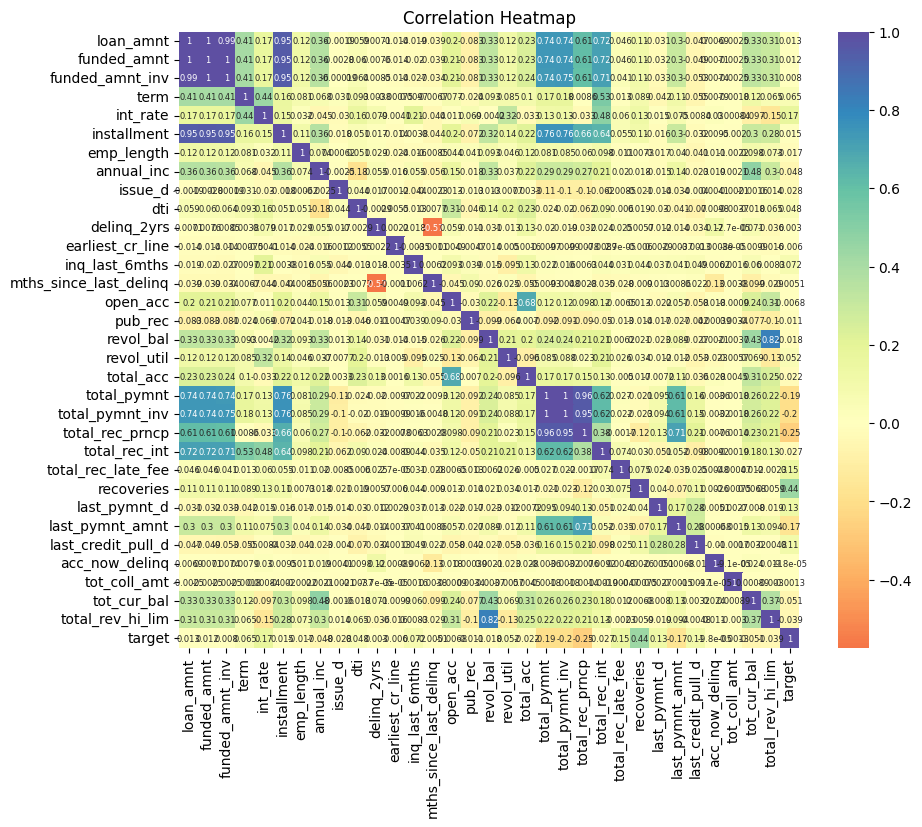

In [15]:
import seaborn as sns
correlation_matrix = X_train_y_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', center=0, annot_kws={'size': 6})
plt.title('Correlation Heatmap')
plt.show()

In [16]:
def get_info(X_):
  list_item = []
  for col in X_.columns:
    list_item.append([col, X_[col].dtype, X_[col].isnull().sum(), round(100*X_[col].isna().sum()/X_.shape[0],2), X_[col].nunique(), X_[col].unique()[:10]])
    info_df = pd.DataFrame(data=list_item, columns='feature data_type missing_count missing_pct unique_count unique_sample'.split())
    info_df['Категориальная Переменная без пропусков'] = np.where(((info_df['data_type']=='object')&(info_df['missing_count']==0))|((info_df['unique_count']==2)&(info_df['missing_count']==0)), info_df['feature'], 0)
    info_df['Категориальная Переменная c пропусками'] = np.where(((info_df['data_type']=='object')&(info_df['missing_count']>0))| ((info_df['unique_count']==2)&(info_df['missing_count']>0)), info_df['feature'], 0)
    info_df['Числовая Переменная без пропусков']= np.where((info_df['feature']!=info_df['Категориальная Переменная без пропусков'])&(info_df['feature']!=info_df['Категориальная Переменная c пропусками'])&(info_df['missing_count']==0), info_df['feature'], 0)
    info_df['Числовая Переменная c пропусками']= np.where((info_df['feature']!=info_df['Категориальная Переменная без пропусков'])&(info_df['feature']!=info_df['Категориальная Переменная c пропусками'])&(info_df['missing_count']>0), info_df['feature'], 0)
    info_df
  return info_df
info_df = get_info(X_train_y_train.drop('target', axis=1))
info_df

,feature,data_type,missing_count,missing_pct,unique_count,unique_sample,Категориальная Переменная без пропусков,Категориальная Переменная c пропусками,Числовая Переменная без пропусков,Числовая Переменная c пропусками
0,loan_amnt,int64,0,0.00,1341,"[5000, 12000, 5825, 31575, 4000, 24300, 10800,...",0,0,loan_amnt,0
1,funded_amnt,int64,0,0.00,1344,"[5000, 12000, 5825, 31575, 4000, 24300, 10800,...",0,0,funded_amnt,0
2,funded_amnt_inv,float64,0,0.00,7370,"[4975.0, 12000.0, 5825.0, 31575.0, 5000.0, 400...",0,0,funded_amnt_inv,0
3,term,int64,0,0.00,2,"[36, 60]",term,0,0,0
4,int_rate,float64,0,0.00,499,"[21.0, 13.11, 20.5, 7.91, 17.57, 16.99, 7.62, ...",0,0,int_rate,0
5,installment,float64,0,0.00,48731,"[188.38, 404.97, 196.58, 845.36, 156.48, 143.7...",0,0,installment,0
6,grade,object,0,0.00,7,"[E, B, A, D, C, F, G]",grade,0,0,0
7,emp_length,float64,14563,4.46,11,"[4.0, 5.0, nan, 3.0, 7.0, 10.0, 2.0, 8.0, 0.0,...",0,0,0,emp_length
8,home_ownership,object,0,0.00,5,"[RENT, MORTGAGE, OTHER, OWN, NONE]",home_ownership,0,0,0
9,annual_inc,float64,4,0.00,24377,"[25000.0, 47000.0, 20868.0, 66000.0, 56000.0, ...",0,0,0,annual_inc


In [17]:
def Find_highest_80_corr_numeric(X_):
  df = X_.copy()
  new_corr = df.corr()
  new_corr.loc[:,:] = np.tril(new_corr, k=-1)
  new_corr = new_corr.stack()
  col_80_corr = new_corr[(new_corr > 0.80) | (new_corr < -0.80)]
  print(col_80_corr)
  print('Из приведенного выше списка мы видим, что представленные переменные имеют корреляцию 80% и более друг с другом, что говорит нам о том, что они по сути одинаковы.\nПоэтому теперь нам нужно выбрать из них ту переменную, которая имеет наибольшую связь с target.\nОстальныке переменные из этого списка удалим.')
  col_80_corr = col_80_corr.index.tolist()
  get_name_col = ()
  for item in col_80_corr:
    get_name_col = list(set(get_name_col) | set(item))
  corr_num_vs_target = pd.concat([df[get_name_col], df['target']], axis = 1)
  corr_num_vs_target = corr_num_vs_target.corr()['target'][:][:-1].sort_values(ascending = True)
  print(corr_num_vs_target)

Highest_80_corr_numeric = Find_highest_80_corr_numeric(X_train_y_train)
Highest_80_corr_numeric

funded_amnt       loan_amnt          0.998558
funded_amnt_inv   loan_amnt          0.994189
                  funded_amnt        0.995957
installment       loan_amnt          0.949702
                  funded_amnt        0.951798
                  funded_amnt_inv    0.947221
total_pymnt_inv   total_pymnt        0.995736
total_rec_prncp   total_pymnt        0.956620
                  total_pymnt_inv    0.952043
total_rev_hi_lim  revol_bal          0.817309
dtype: float64
Из приведенного выше списка мы видим, что представленные переменные имеют корреляцию 80% и более друг с другом, что говорит нам о том, что они по сути одинаковы.
Поэтому теперь нам нужно выбрать из них ту переменную, которая имеет наибольшую связь с target.
Остальныке переменные из этого списка удалим.
total_rec_prncp    -0.253962
total_pymnt_inv    -0.195007
total_pymnt        -0.194188
total_rev_hi_lim   -0.039451
revol_bal          -0.018100
funded_amnt_inv     0.007980
funded_amnt         0.012028
loan_amnt         

In [18]:
# Из связки коррелирующих переменных выбираем total_rec_prncp, а остальные из этой связки можно удалить, потому что они нам не понадобятся при заполнении пропусков, т.к. total_rec_prncp не имеет пропусков.
# Из другой связки коррелирующих признаков оставим revol_bal, не смотря на то, что корреляция данного признака с target меньше, чем у total_rev_hi_lim, но чтобы избежать лишний раз импутирования мы удалим total_rev_hi_lim, потому что это признак имеет около 15% пропусков.
col_for_drop_80 = ['total_rev_hi_lim', 'total_pymnt', 'total_pymnt_inv', 'funded_amnt', 'installment', 'loan_amnt']

X_train_y_train = X_train_y_train.drop(col_for_drop_80, axis = 1)
X_test_y_test = X_test_y_test.drop(col_for_drop_80, axis = 1)
print('X_train_y_train.shape =', X_train_y_train.shape, 'X_test_y_test.shape =', X_test_y_test.shape)

X_train_y_train.shape = (326399, 33) X_test_y_test.shape = (139886, 33)


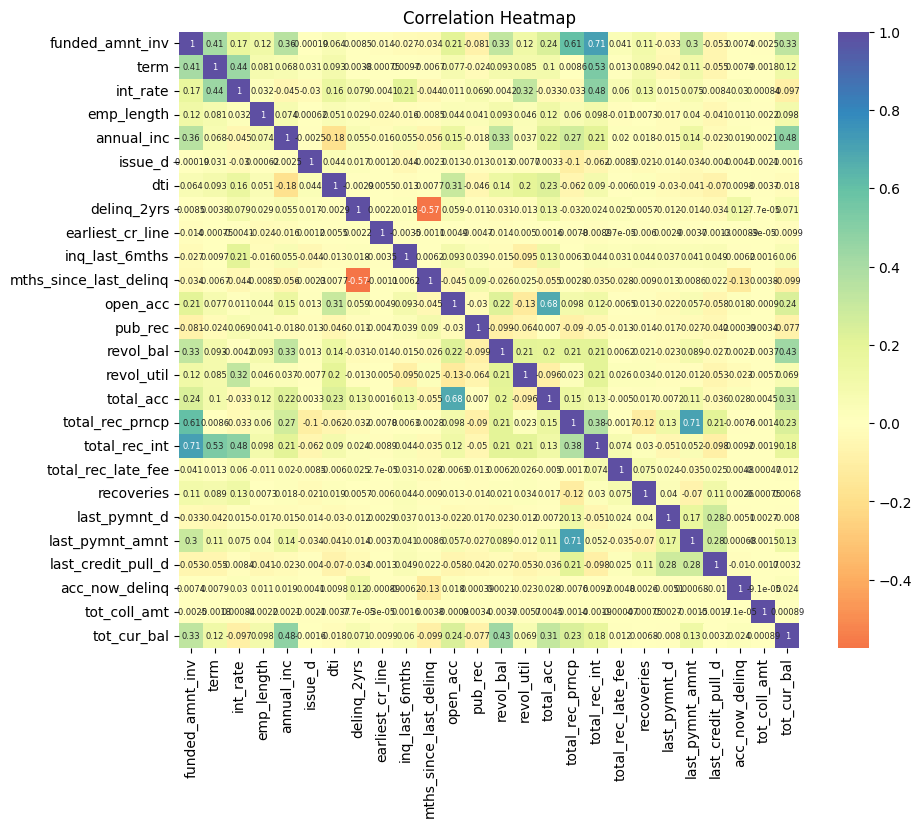

In [19]:
import seaborn as sns
correlation_matrix = X_train_y_train.drop('target', axis = 1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', center=0, annot_kws={'size': 6})
plt.title('Correlation Heatmap')
plt.show()

In [20]:
def Find_highest_65_corr_numeric(X_):
  df = X_.copy()
  new_corr = df.corr()
  new_corr.loc[:,:] = np.tril(new_corr, k=-1)
  new_corr = new_corr.stack()
  col_65_corr = new_corr[(new_corr > 0.65) | (new_corr < -0.65)]
  print(col_65_corr)
  print('Из приведенного выше списка мы видим, что представленные переменные имеют корреляцию 65% и более друг с другом, что говорит нам о том, что они по сути одинаковы.\nПоэтому теперь нам нужно выбрать из них ту переменную, которая имеет наибольшую связь с target.\nОстальныке переменные из этого списка удалим.')
  col_65_corr = col_65_corr.index.tolist()
  get_name_col = ()
  for item in col_65_corr:
    get_name_col = list(set(get_name_col) | set(item))
  corr_num_vs_target = pd.concat([df[get_name_col], df['target']], axis = 1)
  corr_num_vs_target = corr_num_vs_target.corr()['target'][:][:-1].sort_values(ascending = True)
  print(corr_num_vs_target)

Highest_65_corr_numeric = Find_highest_65_corr_numeric(X_train_y_train)
Highest_65_corr_numeric

total_acc        open_acc           0.683128
total_rec_int    funded_amnt_inv    0.713328
last_pymnt_amnt  total_rec_prncp    0.709699
dtype: float64
Из приведенного выше списка мы видим, что представленные переменные имеют корреляцию 65% и более друг с другом, что говорит нам о том, что они по сути одинаковы.
Поэтому теперь нам нужно выбрать из них ту переменную, которая имеет наибольшую связь с target.
Остальныке переменные из этого списка удалим.
total_rec_prncp   -0.253962
last_pymnt_amnt   -0.167766
total_rec_int     -0.026642
total_acc         -0.022456
open_acc          -0.006842
funded_amnt_inv    0.007980
Name: target, dtype: float64


In [21]:
col_for_drop_65 = ['open_acc', 'funded_amnt_inv', 'last_pymnt_amnt']
X_train_y_train = X_train_y_train.drop(col_for_drop_65, axis = 1)
X_test_y_test = X_test_y_test.drop(col_for_drop_65, axis = 1)
print('X_train_y_train.shape =', X_train_y_train.shape, 'X_test_y_test.shape =', X_test_y_test.shape)

X_train_y_train.shape = (326399, 30) X_test_y_test.shape = (139886, 30)


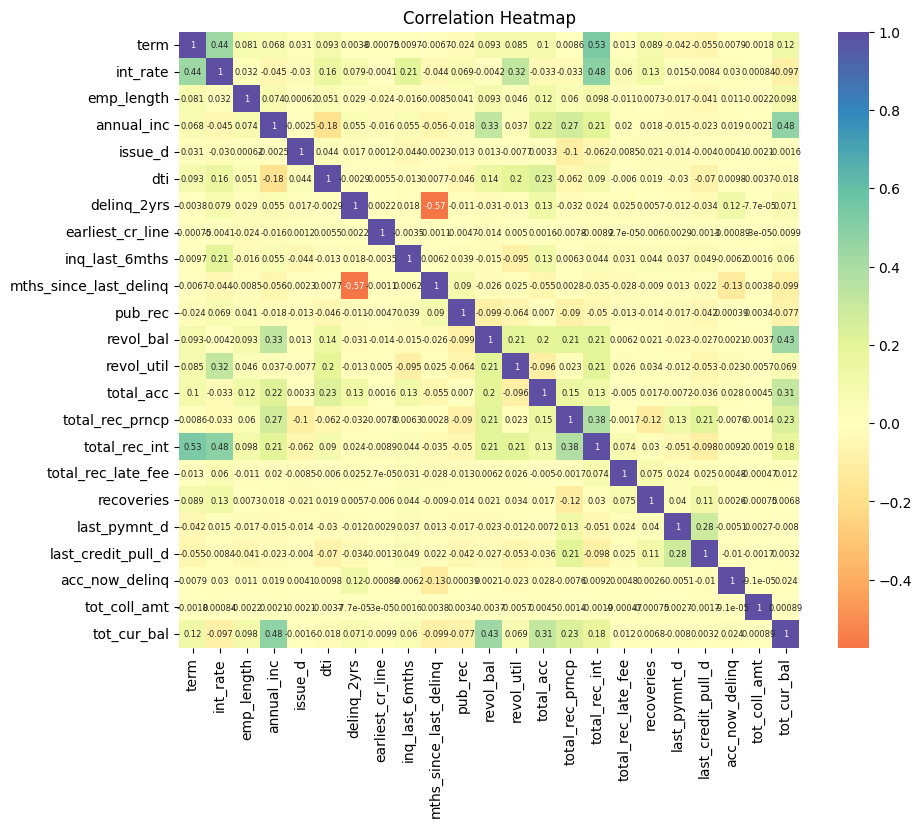

In [22]:
import seaborn as sns
correlation_matrix = X_train_y_train.drop('target', axis = 1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', center=0, annot_kws={'size': 6})
plt.title('Correlation Heatmap')
plt.show()

In [23]:
def get_info(X_):
  list_item = []
  for col in X_.columns:
    list_item.append([col, X_[col].dtype, X_[col].isnull().sum(), round(100*X_[col].isna().sum()/X_.shape[0],2), X_[col].nunique(), X_[col].unique()[:10]])
    info_df = pd.DataFrame(data=list_item, columns='feature data_type missing_count missing_pct unique_count unique_sample'.split())
    info_df['Категориальная Переменная без пропусков'] = np.where(((info_df['data_type']=='object')&(info_df['missing_count']==0))|((info_df['unique_count']==2)&(info_df['missing_count']==0)), info_df['feature'], 0)
    info_df['Категориальная Переменная c пропусками'] = np.where(((info_df['data_type']=='object')&(info_df['missing_count']>0))| ((info_df['unique_count']==2)&(info_df['missing_count']>0)), info_df['feature'], 0)
    info_df['Числовая Переменная без пропусков']= np.where((info_df['feature']!=info_df['Категориальная Переменная без пропусков'])&(info_df['feature']!=info_df['Категориальная Переменная c пропусками'])&(info_df['missing_count']==0), info_df['feature'], 0)
    info_df['Числовая Переменная c пропусками']= np.where((info_df['feature']!=info_df['Категориальная Переменная без пропусков'])&(info_df['feature']!=info_df['Категориальная Переменная c пропусками'])&(info_df['missing_count']>0), info_df['feature'], 0)
    info_df
  return info_df
info_df = get_info(X_train_y_train.drop('target', axis=1))
info_df

,feature,data_type,missing_count,missing_pct,unique_count,unique_sample,Категориальная Переменная без пропусков,Категориальная Переменная c пропусками,Числовая Переменная без пропусков,Числовая Переменная c пропусками
0,term,int64,0,0.00,2,"[36, 60]",term,0,0,0
1,int_rate,float64,0,0.00,499,"[21.0, 13.11, 20.5, 7.91, 17.57, 16.99, 7.62, ...",0,0,int_rate,0
2,grade,object,0,0.00,7,"[E, B, A, D, C, F, G]",grade,0,0,0
3,emp_length,float64,14563,4.46,11,"[4.0, 5.0, nan, 3.0, 7.0, 10.0, 2.0, 8.0, 0.0,...",0,0,0,emp_length
4,home_ownership,object,0,0.00,5,"[RENT, MORTGAGE, OTHER, OWN, NONE]",home_ownership,0,0,0
5,annual_inc,float64,4,0.00,24377,"[25000.0, 47000.0, 20868.0, 66000.0, 56000.0, ...",0,0,0,annual_inc
6,verification_status,object,0,0.00,3,"[Verified, Not Verified, Source Verified]",verification_status,0,0,0
7,issue_d,int64,0,0.00,12,"[6, 10, 5, 2, 4, 9, 3, 11, 8, 1]",0,0,issue_d,0
8,purpose,object,0,0.00,14,"[debt_consolidation, credit_card, home_improve...",purpose,0,0,0
9,addr_state,object,0,0.00,50,"[FL, CA, SC, IL, CT, OR, MD, MI, TX, WA]",addr_state,0,0,0


In [24]:
def preprocessing_dtypes_for_Train_Test(info_df, X_train_y_train, X_test_y_test):
  num_col_missing_value = info_df['feature'][info_df['Числовая Переменная c пропусками'] !=0].tolist()
  num_col_not_missing_value = info_df['feature'][info_df['Числовая Переменная без пропусков'] !=0].tolist()

  cat_col_missing_value = info_df['feature'][info_df['Категориальная Переменная c пропусками'] !=0].tolist()
  cat_col_not_missing_value = info_df['feature'][info_df['Категориальная Переменная без пропусков'] !=0].tolist()

  numeric_features = num_col_not_missing_value + num_col_missing_value
  categorical_features = cat_col_not_missing_value + cat_col_missing_value

  X_train_y_train[cat_col_missing_value] = X_train_y_train[cat_col_missing_value].astype('str')
  X_train_y_train[cat_col_not_missing_value] = X_train_y_train[cat_col_not_missing_value].astype('str')

  X_test_y_test[cat_col_missing_value] = X_test_y_test[cat_col_missing_value].astype('str')
  X_test_y_test[cat_col_not_missing_value] = X_test_y_test[cat_col_not_missing_value].astype('str')

  return (num_col_missing_value, num_col_not_missing_value, cat_col_missing_value, cat_col_not_missing_value, numeric_features, categorical_features, X_train_y_train, X_test_y_test)
num_col_missing_value, num_col_not_missing_value, cat_col_missing_value, cat_col_not_missing_value, numeric_features, categorical_features, X_train_y_train, X_test_y_test = preprocessing_dtypes_for_Train_Test(info_df, X_train_y_train, X_test_y_test)
print('X_train_y_train.shape =', X_train_y_train.shape, 'X_test_y_test =', X_test_y_test.shape)

X_train_y_train.shape = (326399, 30) X_test_y_test = (139886, 30)


In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

num_col_missing_value
num_col_not_missing_value
cat_col_missing_value
cat_col_not_missing_value

numeric_features
categorical_features


from sklearn.base import BaseEstimator, TransformerMixin
class FeatureSelector( BaseEstimator, TransformerMixin ):
  def __init__(self, feature_names):
    self.feature_names = feature_names
  def fit(self, X, y=None):
    return self
  def transform( self, X, y=None):
    return X[self.feature_names]

from sklearn.pipeline import Pipeline
num_pipeline_for_missing = Pipeline(steps = [
    ('Selector_for_num_missing', FeatureSelector(num_col_missing_value))])

num_pipeline_for_not_missing = Pipeline(steps = [
    ('Selector_for_not_num_missing', FeatureSelector(num_col_not_missing_value))])


cat_pipeline_for_missing = Pipeline(steps = [
    ('Selector_for_cat_missing', FeatureSelector(cat_col_missing_value)),
    ('OrdinalEncoder_for_cat_missing', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])


cat_pipeline_for_not_missing = Pipeline(steps = [
    ('Selector_for_cat_not_missing', FeatureSelector(cat_col_not_missing_value)),
    ('OrdinalEncoder_for_cat_not_missing', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor
exEstimator = DecisionTreeRegressor(max_features='sqrt', random_state=42)
exStyle = 'descending'
Imputer_MICE_for_all_num =IterativeImputer(estimator=exEstimator, imputation_order=exStyle, random_state=42)

from sklearn.compose import make_column_selector
full_preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline_for_missing', num_pipeline_for_missing, num_col_missing_value),
        ('num_pipeline_for_not_missing', num_pipeline_for_not_missing, num_col_not_missing_value),
        ('cat_pipeline_for_missing', cat_pipeline_for_missing, cat_col_missing_value),
        ('cat_pipeline_for_not_missing', cat_pipeline_for_not_missing, cat_col_not_missing_value)], remainder= 'drop', n_jobs=-1)

preprocessor_pipeline = Pipeline(steps= [('full_preprocessor', full_preprocessor), ('Imputer_MICE_for_all_num', Imputer_MICE_for_all_num)])
preprocessor_X_train = preprocessor_pipeline.fit_transform(X_train_y_train.drop('target',axis = 1))
preprocessor_X_train

array([[4.0000e+00, 2.5000e+04, 0.0000e+00, ..., 2.0000e+00, 9.0000e+00,
        0.0000e+00],
       [5.0000e+00, 4.7000e+04, 1.0000e+00, ..., 2.0000e+00, 9.0000e+00,
        0.0000e+00],
       [1.0000e+01, 2.0868e+04, 0.0000e+00, ..., 1.0000e+00, 4.0000e+00,
        0.0000e+00],
       ...,
       [7.0000e+00, 8.5000e+04, 0.0000e+00, ..., 1.0000e+00, 4.2000e+01,
        0.0000e+00],
       [2.0000e+00, 4.0000e+04, 0.0000e+00, ..., 2.0000e+00, 2.3000e+01,
        0.0000e+00],
       [1.0000e+00, 6.6000e+04, 0.0000e+00, ..., 1.2000e+01, 3.2000e+01,
        1.0000e+00]])

In [27]:
col_num_pipeline_for_missing = preprocessor_pipeline.named_steps['full_preprocessor'].transformers_[0][2]
col_num_pipeline_for_not_missing = preprocessor_pipeline.named_steps['full_preprocessor'].transformers_[1][2]
col_cat_pipeline_for_missing = preprocessor_pipeline.named_steps['full_preprocessor'].transformers_[2][2]
col_cat_pipeline_for_not_missing = preprocessor_pipeline.named_steps['full_preprocessor'].transformers_[3][1].named_steps['OrdinalEncoder_for_cat_not_missing'].get_feature_names_out().tolist()
columns_all = col_num_pipeline_for_missing + col_num_pipeline_for_not_missing + col_cat_pipeline_for_missing + col_cat_pipeline_for_not_missing
columns_all
df_preprocessor_train = pd.DataFrame(preprocessor_X_train, index=X_train_y_train.index, columns = columns_all)
df_preprocessor_train.head(3)

,emp_length,annual_inc,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_util,total_acc,last_pymnt_d,last_credit_pull_d,acc_now_delinq,tot_coll_amt,tot_cur_bal,int_rate,issue_d,dti,revol_bal,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,term,grade,home_ownership,verification_status,purpose,addr_state,initial_list_status
126302,4.0,25000.0,0.0,3.0,1.0,0.0,0.0,95.3,5.0,1.0,9.0,0.0,0.0,3909.0,21.00,6.0,5.90,3909.0,5000.0,573.93,0.0,0.0,0.0,4.0,4.0,2.0,2.0,9.0,0.0
190149,5.0,47000.0,1.0,9.0,0.0,12.0,0.0,46.1,25.0,7.0,1.0,0.0,161.0,94809.0,13.11,10.0,18.36,13373.0,12000.0,2552.10,0.0,0.0,0.0,1.0,0.0,0.0,2.0,9.0,0.0
136292,10.0,20868.0,0.0,1.0,0.0,57.0,0.0,86.8,11.0,1.0,1.0,0.0,0.0,11888.0,13.11,5.0,22.77,11888.0,5825.0,917.48,0.0,0.0,0.0,1.0,4.0,2.0,1.0,4.0,0.0


In [28]:
preprocessor_X_test = preprocessor_pipeline.transform(X_test_y_test.drop('target', axis = 1))
df_preprocessor_test = pd.DataFrame(preprocessor_X_test, columns = columns_all, index=X_test_y_test.index)
df_preprocessor_test.head(4)

,emp_length,annual_inc,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_util,total_acc,last_pymnt_d,last_credit_pull_d,acc_now_delinq,tot_coll_amt,tot_cur_bal,int_rate,issue_d,dti,revol_bal,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,term,grade,home_ownership,verification_status,purpose,addr_state,initial_list_status
357550,10.0,151715.64,0.0,4.0,1.0,37.0,0.0,39.3,34.0,1.0,1.0,0.0,0.0,46386.0,14.99,7.0,12.54,23401.0,13625.13,5627.88,0.0,0.00,0.0,2.0,4.0,2.0,2.0,4.0,0.0
342667,1.0,85000.00,0.0,8.0,3.0,32.0,0.0,32.1,13.0,1.0,1.0,0.0,0.0,211494.0,6.03,7.0,15.42,15457.0,8116.92,1196.46,0.0,0.00,0.0,0.0,0.0,0.0,1.0,1.0,1.0
9881,3.0,40000.00,0.0,4.0,0.0,32.0,0.0,51.6,35.0,9.0,2.0,0.0,0.0,255655.0,23.59,8.0,15.42,20081.0,6486.18,7890.17,0.0,1087.02,1.0,6.0,4.0,0.0,2.0,30.0,0.0
102562,5.0,25000.00,0.0,5.0,0.0,25.0,0.0,49.2,11.0,5.0,1.0,0.0,0.0,14715.0,11.55,8.0,21.98,14715.0,8325.00,651.76,0.0,0.00,0.0,1.0,4.0,0.0,2.0,33.0,0.0


In [29]:
print('X_train_y_train.shape =', X_train_y_train.shape, 'X_test_y_test.shape =', X_test_y_test.shape)
print('OHE_MICE X_train shape =', df_preprocessor_train.shape, 'OHE_MICE X_train shape =', df_preprocessor_test.shape)

X_train_y_train.shape = (326399, 30) X_test_y_test.shape = (139886, 30)
OHE_MICE X_train shape = (326399, 29) OHE_MICE X_train shape = (139886, 29)


In [30]:
def X_y_for_WOE(df_preprocessor_train, df_preprocessor_test, numeric_features, categorical_features, X_train_y_train, X_test_y_test):
  X_train_y_train_for_WOE = pd.concat([df_preprocessor_train, X_train_y_train['target']], axis = 1).astype(int)
  X_test_y_test_for_WOE = pd.concat([df_preprocessor_test, X_test_y_test['target']] , axis = 1).astype(int)

  X_train_y_train = X_train_y_train_for_WOE
  X_test_y_test = X_test_y_test_for_WOE

  y_train = X_train_y_train['target']
  X_train = X_train_y_train.drop('target', axis = 1)

  y_test = X_test_y_test['target']
  X_test = X_test_y_test.drop('target', axis = 1)
  return (X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = X_y_for_WOE(df_preprocessor_train, df_preprocessor_test, numeric_features, categorical_features, X_train_y_train, X_test_y_test)

print('X_train_y_train.shape =', X_train_y_train.shape, 'X_test_y_test.shape =', X_test_y_test.shape)
print('OHE_MICE X_train shape =', df_preprocessor_train.shape, 'OHE_MICE X_train shape =', df_preprocessor_test.shape)
print('X_train.shape:', X_train.shape,'y_train.shape:', y_train.shape, 'X_test.shape:', X_test.shape, 'y_test.shape:', y_test.shape)

X_train_y_train.shape = (326399, 30) X_test_y_test.shape = (139886, 30)
OHE_MICE X_train shape = (326399, 29) OHE_MICE X_train shape = (139886, 29)
X_train.shape: (326399, 29) y_train.shape: (326399,) X_test.shape: (139886, 29) y_test.shape: (139886,)


In [31]:
import riskpy

In [32]:
from riskpy.modeling.binning import Binner

In [33]:
from riskpy.graphs.graphs import binning_barchart

In [34]:
X_train['target'] = y_train
X_test['target'] = y_test

In [35]:
binner = Binner()
bins = binner.fit(X_train, 'target')
X_train_WOE = binner.transform(X_train)
X_test_WOE = binner.transform(X_test)

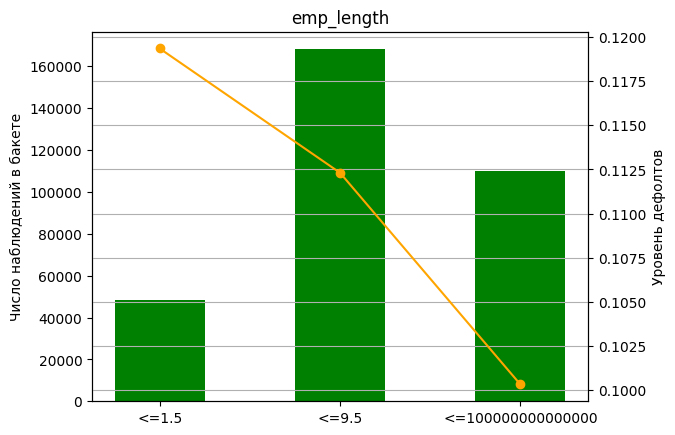

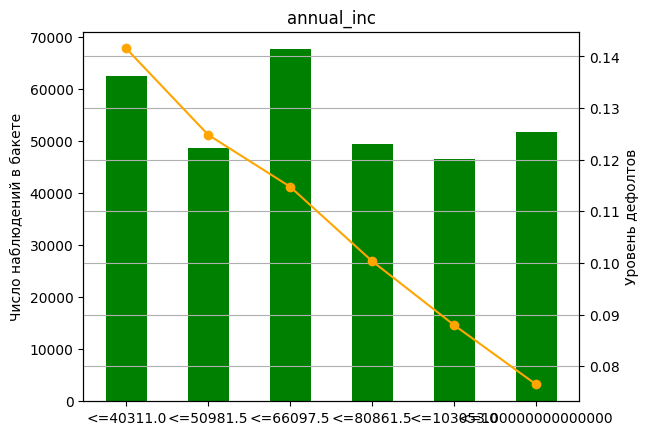

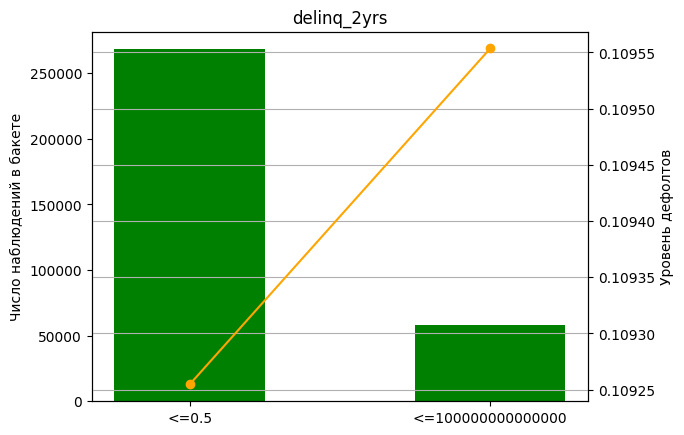

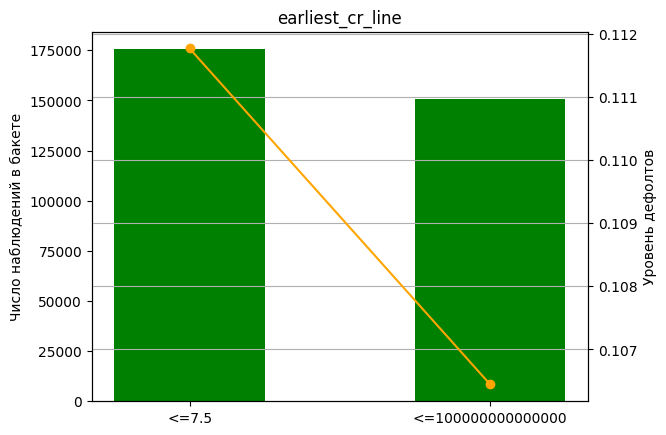

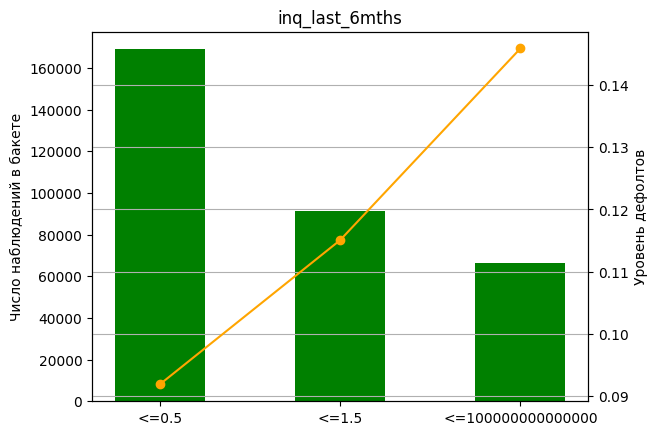

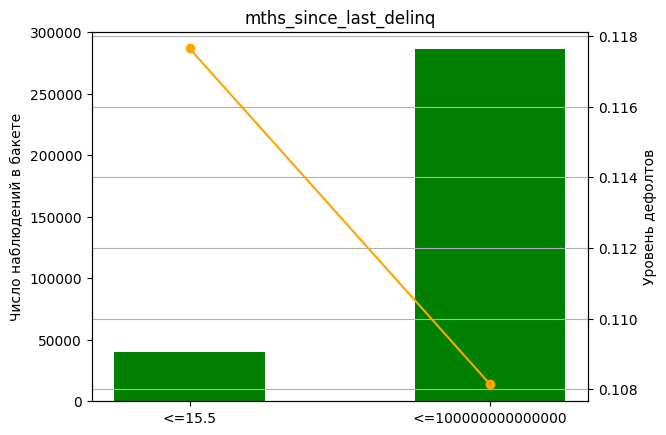

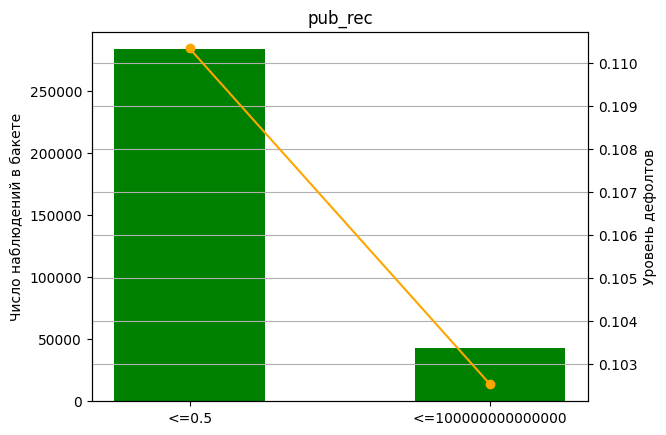

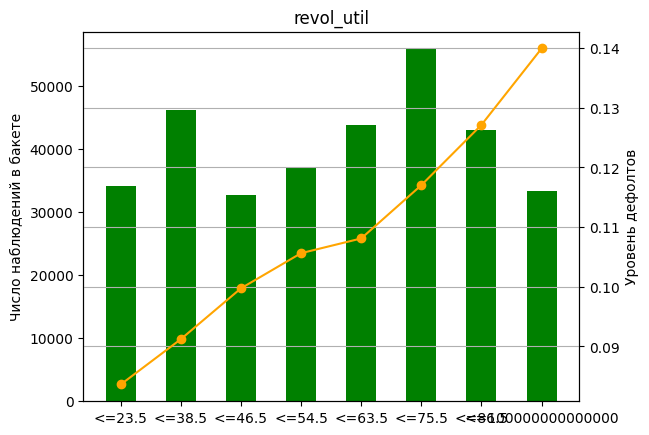

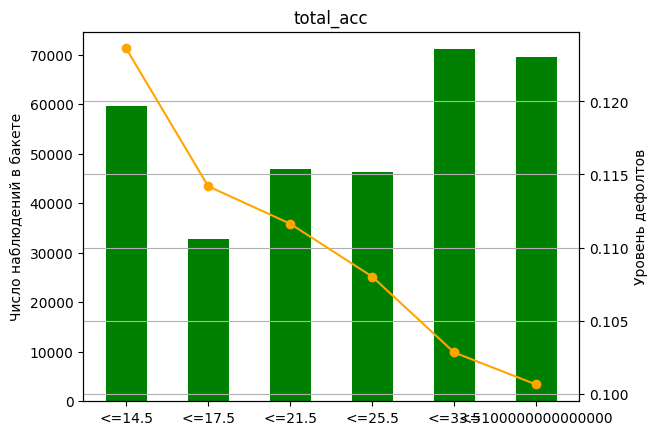

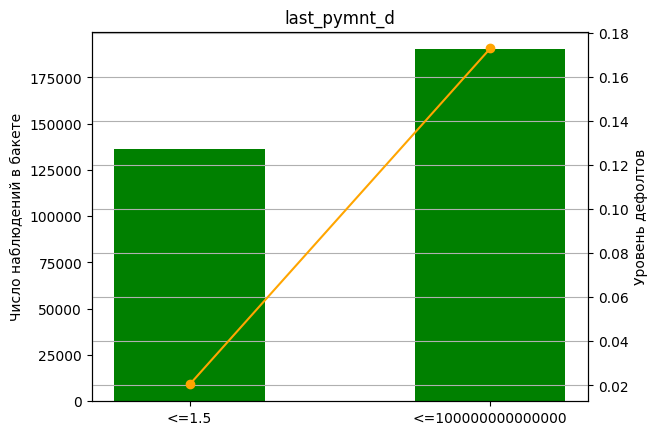

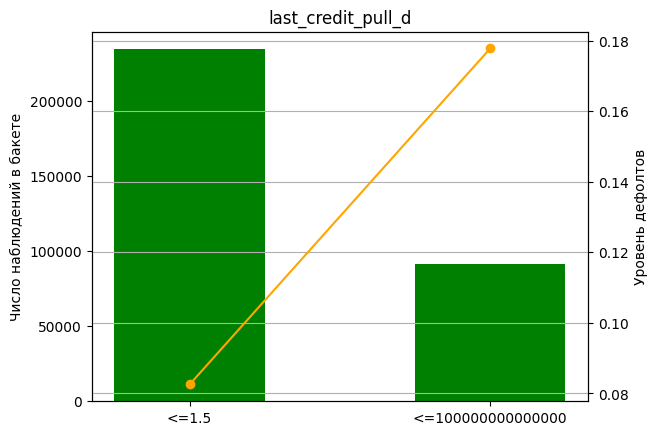

No binning for variable acc_now_delinq


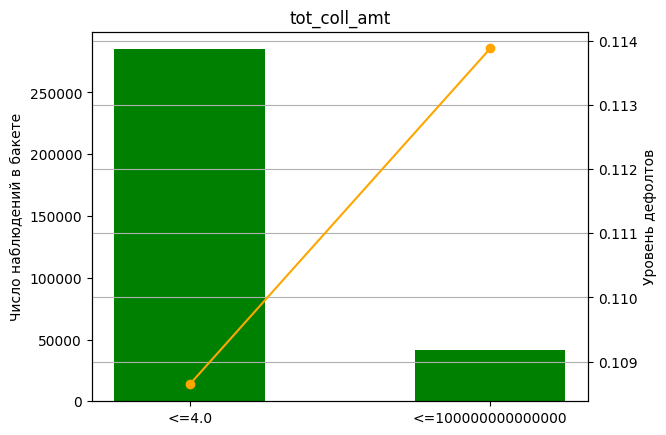

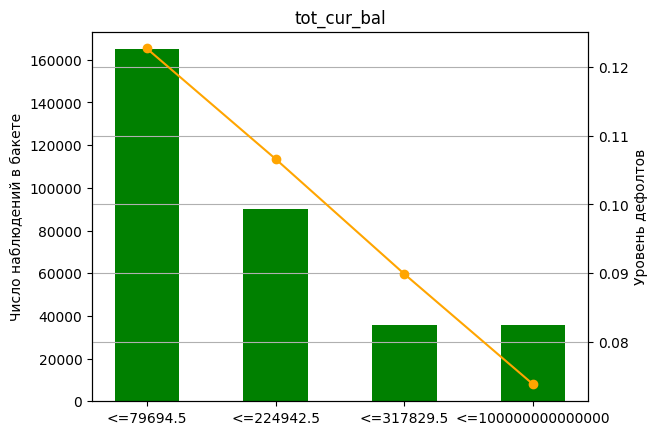

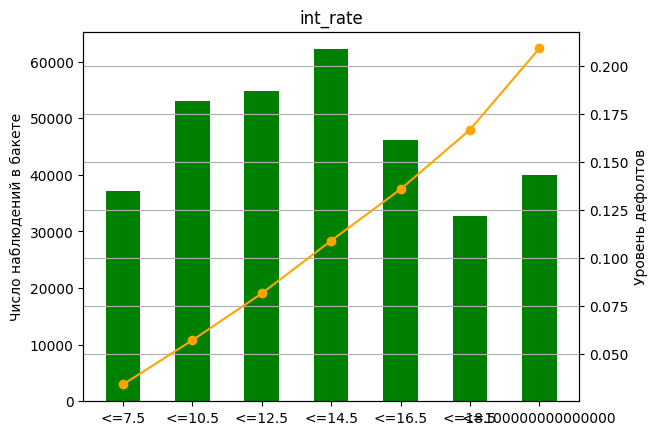

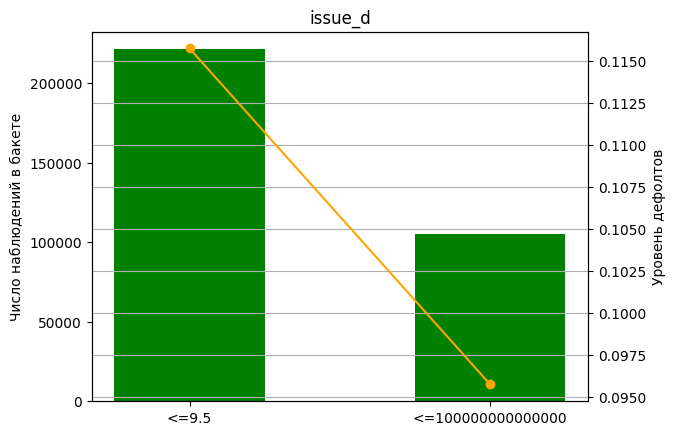

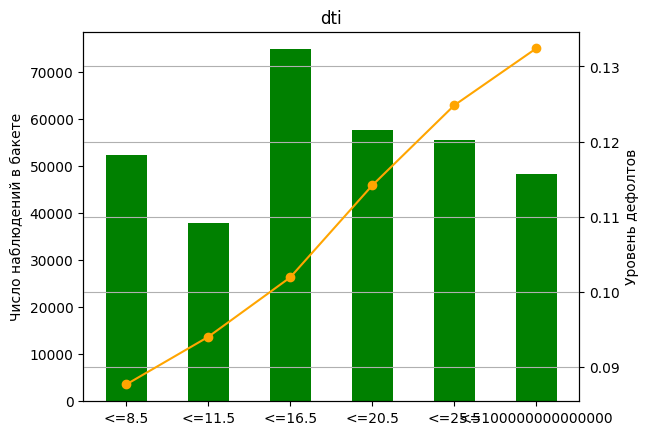

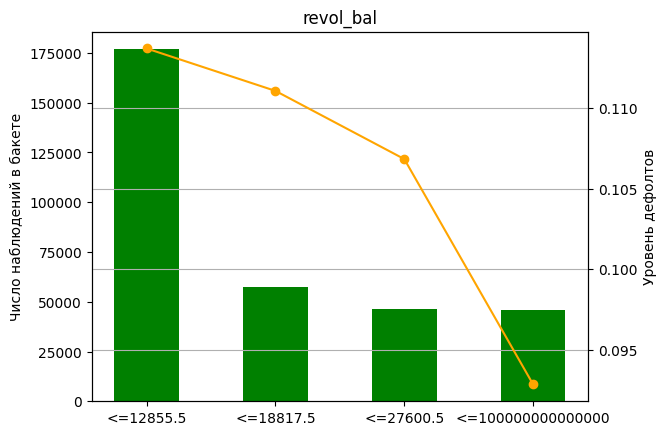

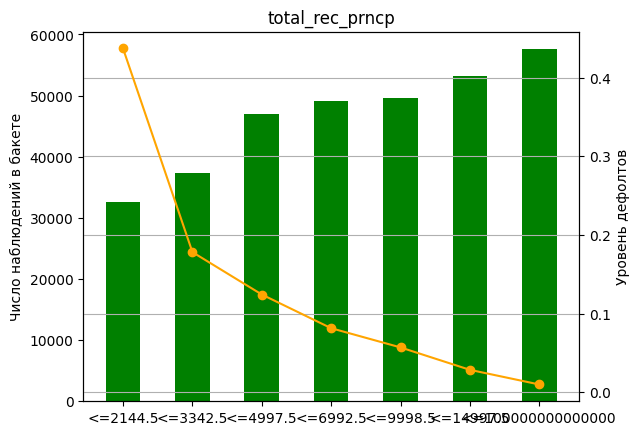

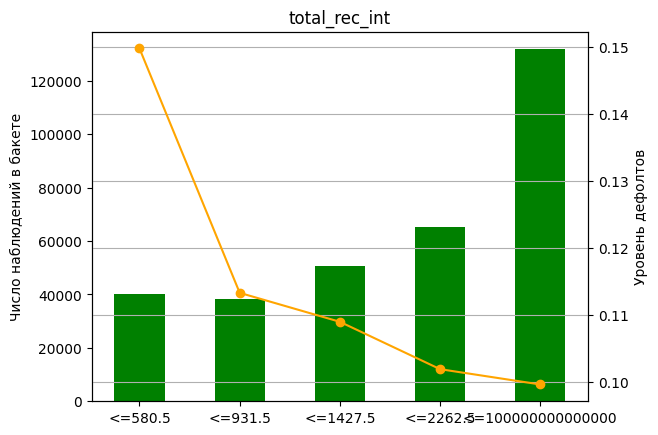

No binning for variable total_rec_late_fee
No binning for variable recoveries


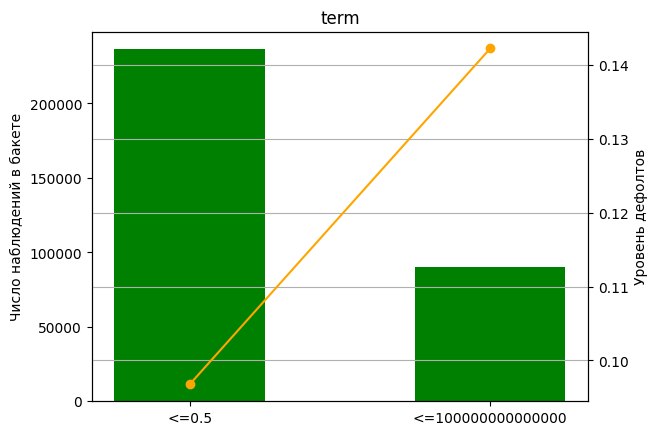

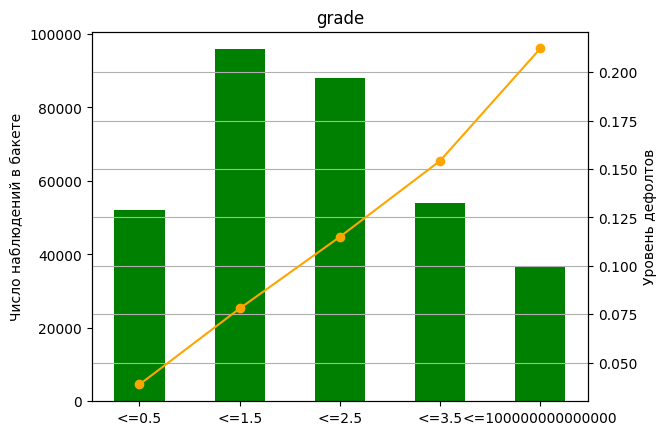

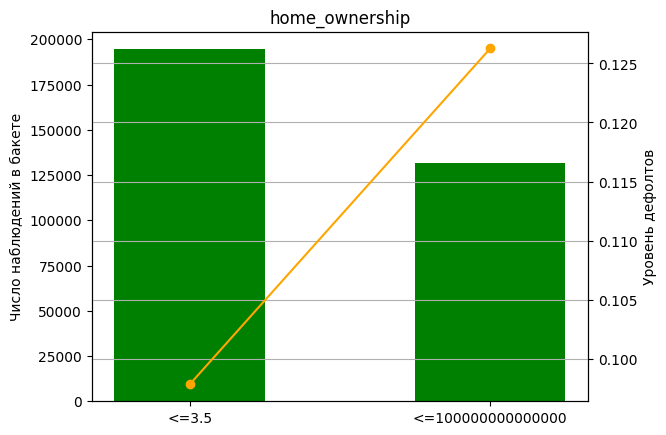

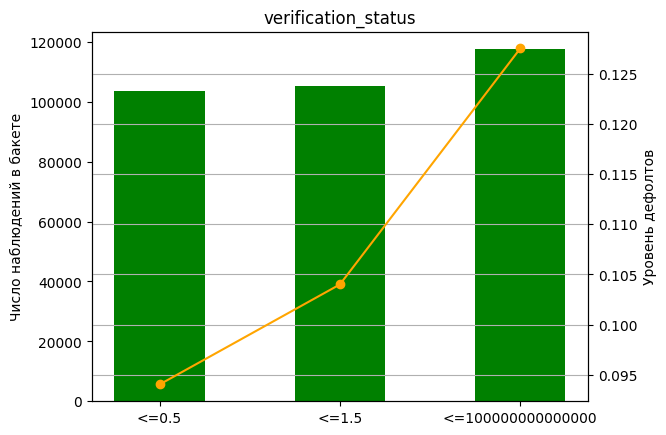

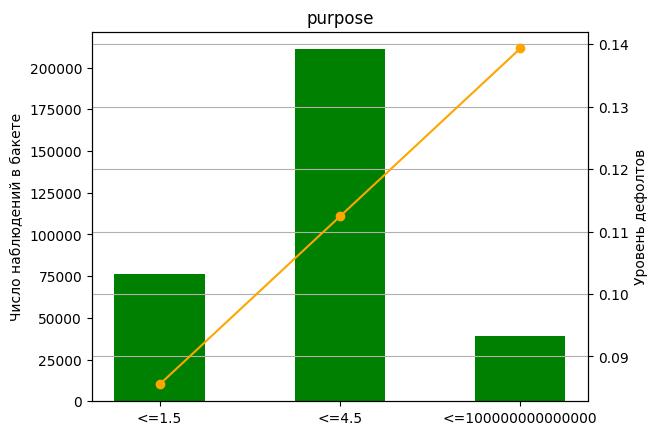

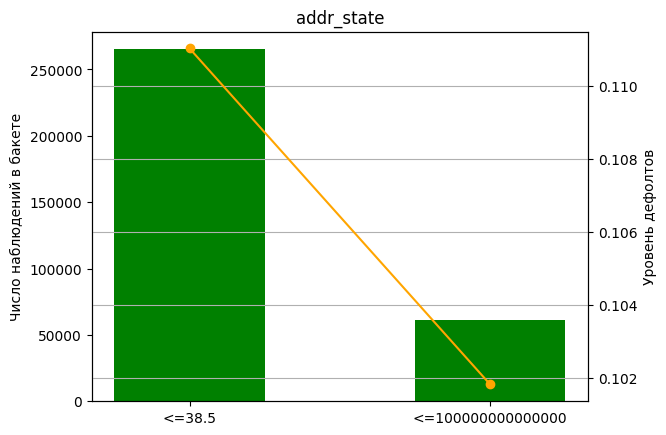

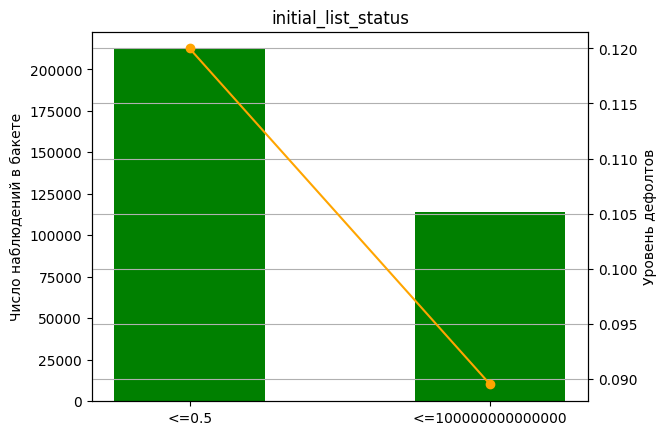

In [36]:
binning_barchart(bins)

In [37]:
X_train_WOE.head(3)

,emp_length_woe,annual_inc_woe,delinq_2yrs_woe,earliest_cr_line_woe,inq_last_6mths_woe,mths_since_last_delinq_woe,pub_rec_woe,revol_util_woe,total_acc_woe,last_pymnt_d_woe,last_credit_pull_d_woe,tot_coll_amt_woe,tot_cur_bal_woe,int_rate_woe,issue_d_woe,dti_woe,revol_bal_woe,total_rec_prncp_woe,total_rec_int_woe,term_woe,grade_woe,home_ownership_woe,verification_status_woe,purpose_woe,addr_state_woe,initial_list_status_woe,target
126302,-0.030448,-0.295349,0.000545,-0.025060,-0.057678,-0.082992,-0.010549,-0.282070,-0.139336,1.773013,-0.566108,0.006860,-0.130615,-0.767887,-0.064519,0.243953,-0.044128,0.325118,-0.361385,0.136078,-0.786572,-0.163477,-0.174850,-0.031507,-0.017648,-0.105376,0
190149,-0.030448,-0.150331,-0.002576,0.029751,0.193518,-0.082992,-0.010549,0.102229,0.013309,-0.533042,0.310510,-0.046225,0.028005,0.003069,0.147631,-0.049096,-0.017817,1.431343,0.103807,0.136078,0.371954,0.123989,0.167471,-0.031507,-0.017648,-0.105376,0
136292,0.095876,-0.295349,0.000545,-0.025060,0.193518,0.012077,-0.010549,-0.171345,-0.139336,1.773013,0.310510,0.006860,-0.130615,0.003069,-0.064519,-0.150344,-0.044128,0.325118,-0.040245,0.136078,0.371954,-0.163477,-0.174850,0.271983,-0.017648,-0.105376,0


In [38]:
X_test_WOE.head(3)

,emp_length_woe,annual_inc_woe,delinq_2yrs_woe,earliest_cr_line_woe,inq_last_6mths_woe,mths_since_last_delinq_woe,pub_rec_woe,revol_util_woe,total_acc_woe,last_pymnt_d_woe,last_credit_pull_d_woe,tot_coll_amt_woe,tot_cur_bal_woe,int_rate_woe,issue_d_woe,dti_woe,revol_bal_woe,total_rec_prncp_woe,total_rec_int_woe,term_woe,grade_woe,home_ownership_woe,verification_status_woe,purpose_woe,addr_state_woe,initial_list_status_woe,target
357550,0.095876,0.393519,0.000545,-0.025060,-0.057678,0.012077,-0.010549,0.102229,0.092411,1.773013,0.310510,0.00686,-0.130615,0.003069,-0.064519,0.077878,0.025671,1.431343,0.103807,0.136078,-0.057290,-0.163477,-0.174850,-0.031507,-0.017648,-0.105376,0
342667,-0.099276,0.240929,0.000545,0.029751,-0.330718,0.012077,-0.010549,0.201051,-0.139336,1.773013,0.310510,0.00686,0.028005,1.246500,-0.064519,0.077878,-0.017817,0.708151,0.003567,0.136078,1.113315,0.123989,0.167471,0.271983,-0.017648,0.222219,0
9881,-0.030448,-0.295349,0.000545,-0.025060,0.193518,0.012077,-0.010549,0.038315,0.092411,-0.533042,-0.566108,0.00686,0.217369,-0.767887,-0.064519,0.077878,0.025671,0.325118,0.103807,-0.301367,-0.786572,-0.163477,0.167471,-0.031507,-0.017648,-0.105376,1


In [39]:
y_train_WOE = X_train_WOE['target']
y_test_WOE = X_test_WOE['target']

X_train_WOE = X_train_WOE.drop('target', axis = 1)
X_test_WOE = X_test_WOE.drop('target', axis = 1)

In [40]:
#Запустим метод Forward Selection для отбора признаков.
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
FEATURE_COUNT = 'best'
N_SPLITS = 3
RANDOM_STATE = 42

logreg = LogisticRegression(random_state = RANDOM_STATE, solver = 'liblinear', penalty = 'l1')
skf = StratifiedKFold(n_splits = N_SPLITS, shuffle = True, random_state = RANDOM_STATE)

selector = SFS(logreg,
           k_features = FEATURE_COUNT ,
           forward = True,
           scoring ='roc_auc',
           cv = skf)

selector = selector.fit(X_train_WOE, y_train_WOE)

In [41]:
best_FEATURE_COUNT = len(selector.k_feature_idx_)
best_FEATURE = list(selector.subsets_[best_FEATURE_COUNT]['feature_names'])
best_FEATURE

['emp_length_woe',
 'annual_inc_woe',
 'earliest_cr_line_woe',
 'inq_last_6mths_woe',
 'pub_rec_woe',
 'revol_util_woe',
 'total_acc_woe',
 'last_pymnt_d_woe',
 'last_credit_pull_d_woe',
 'tot_coll_amt_woe',
 'tot_cur_bal_woe',
 'int_rate_woe',
 'issue_d_woe',
 'dti_woe',
 'revol_bal_woe',
 'total_rec_prncp_woe',
 'total_rec_int_woe',
 'term_woe',
 'grade_woe',
 'verification_status_woe',
 'addr_state_woe',
 'initial_list_status_woe']

In [42]:
print('best_FEATURE_COUNT:', best_FEATURE_COUNT)

best_FEATURE_COUNT: 22


In [43]:
X_train_WOE_final = X_train_WOE[best_FEATURE]
X_test_WOE_final = X_test_WOE[best_FEATURE]

In [44]:
X_train_WOE_final.head(3)

,emp_length_woe,annual_inc_woe,earliest_cr_line_woe,inq_last_6mths_woe,pub_rec_woe,revol_util_woe,total_acc_woe,last_pymnt_d_woe,last_credit_pull_d_woe,tot_coll_amt_woe,tot_cur_bal_woe,int_rate_woe,issue_d_woe,dti_woe,revol_bal_woe,total_rec_prncp_woe,total_rec_int_woe,term_woe,grade_woe,verification_status_woe,addr_state_woe,initial_list_status_woe
126302,-0.030448,-0.295349,-0.025060,-0.057678,-0.010549,-0.282070,-0.139336,1.773013,-0.566108,0.006860,-0.130615,-0.767887,-0.064519,0.243953,-0.044128,0.325118,-0.361385,0.136078,-0.786572,-0.174850,-0.017648,-0.105376
190149,-0.030448,-0.150331,0.029751,0.193518,-0.010549,0.102229,0.013309,-0.533042,0.310510,-0.046225,0.028005,0.003069,0.147631,-0.049096,-0.017817,1.431343,0.103807,0.136078,0.371954,0.167471,-0.017648,-0.105376
136292,0.095876,-0.295349,-0.025060,0.193518,-0.010549,-0.171345,-0.139336,1.773013,0.310510,0.006860,-0.130615,0.003069,-0.064519,-0.150344,-0.044128,0.325118,-0.040245,0.136078,0.371954,-0.174850,-0.017648,-0.105376


In [45]:
# Построим карту корреляций для выбранных признаков. И удалим высокоскоррелированные переменные
def Find_highest_80_corr_for_best_FEATURE(X_, y_):
  df = X_.copy()
  new_corr = df.corr()
  new_corr.loc[:,:] = np.tril(new_corr, k=-1)
  new_corr = new_corr.stack()
  col_80_corr = new_corr[(new_corr > 0.80) | (new_corr < -0.80)]
  if len(col_80_corr) > 0:
    print(col_80_corr)
    print('Из приведенного выше списка мы видим, что представленные переменные имеют корреляцию 80% и более друг с другом, что говорит нам о том, что они по сути одинаковы.\nПоэтому теперь нам нужно выбрать из них ту переменную, которая имеет наибольшую связь с target.\nОстальныке переменные из этого списка удалим.')
  if len(col_80_corr) == 0:
    print('Коррелирующие признаки отсутсвуют')
  col_80_corr = col_80_corr.index.tolist()
  get_name_col = ()
  for item in col_80_corr:
    get_name_col = list(set(get_name_col) | set(item))
  corr_num_vs_target = pd.concat([df[get_name_col], y_], axis = 1)
  corr_num_vs_target = corr_num_vs_target.corr()['target'][:][:-1].sort_values(ascending = True)
  print(corr_num_vs_target)

Highest_80_corr_best_FEATURE = Find_highest_80_corr_for_best_FEATURE(X_train_WOE_final, y_train_WOE)
Highest_80_corr_best_FEATURE

grade_woe  int_rate_woe    0.932029
dtype: float64
Из приведенного выше списка мы видим, что представленные переменные имеют корреляцию 80% и более друг с другом, что говорит нам о том, что они по сути одинаковы.
Поэтому теперь нам нужно выбрать из них ту переменную, которая имеет наибольшую связь с target.
Остальныке переменные из этого списка удалим.
int_rate_woe   -0.166759
grade_woe      -0.158830
Name: target, dtype: float64


In [46]:
col_for_drop_80_best_FEATURE = ['grade_woe']
X_train_WOE_final = X_train_WOE_final.drop(col_for_drop_80_best_FEATURE, axis = 1)
X_test_WOE_final = X_test_WOE_final.drop(col_for_drop_80_best_FEATURE, axis = 1)

In [47]:
# Эффективность моделей бинарной классификации наилучшим образом оценивает метрика ROC/AUC (Gini).
# Поэтому оценим значимость каждого признака, вычислив коэффициент Gini.

gini_features = pd.DataFrame(index=X_train_WOE_final.columns, columns = ['Gini'])
for feat in X_train_WOE_final.columns:
    logreg = LogisticRegression(random_state = RANDOM_STATE, penalty = 'l2', C = 1.5)
    logreg.fit(X_train_WOE_final.loc[:, feat].values.reshape(-1,1), y_train_WOE)
    preds_train = logreg.predict_proba(X_train_WOE_final.loc[:, feat].values.reshape(-1,1))[:, 1]
    gini_features.loc[feat, 'Gini'] = 2*roc_auc_score(y_train_WOE, preds_train) - 1
gini_features = gini_features.sort_values('Gini',ascending=False).head(50).dropna()
gini_features = gini_features[gini_features.sort_values('Gini',ascending=False)['Gini']>0.08]
gini_features

,Gini
total_rec_prncp_woe,0.590225
last_pymnt_d_woe,0.380988
int_rate_woe,0.309536
last_credit_pull_d_woe,0.197643
annual_inc_woe,0.129012
inq_last_6mths_woe,0.110828
revol_util_woe,0.096386
term_woe,0.09343
dti_woe,0.089919
tot_cur_bal_woe,0.086781


In [48]:
gini_features_more_than_8 = gini_features.index
gini_features_more_than_8

Index(['total_rec_prncp_woe', 'last_pymnt_d_woe', 'int_rate_woe',
       'last_credit_pull_d_woe', 'annual_inc_woe', 'inq_last_6mths_woe',
       'revol_util_woe', 'term_woe', 'dti_woe', 'tot_cur_bal_woe'],
      dtype='object')

In [49]:
X_train_WOE_final = X_train_WOE_final[gini_features_more_than_8]
X_test_WOE_final = X_test_WOE_final[gini_features_more_than_8]

In [50]:
X_train_WOE_final.head(3)

,total_rec_prncp_woe,last_pymnt_d_woe,int_rate_woe,last_credit_pull_d_woe,annual_inc_woe,inq_last_6mths_woe,revol_util_woe,term_woe,dti_woe,tot_cur_bal_woe
126302,0.325118,1.773013,-0.767887,-0.566108,-0.295349,-0.057678,-0.282070,0.136078,0.243953,-0.130615
190149,1.431343,-0.533042,0.003069,0.310510,-0.150331,0.193518,0.102229,0.136078,-0.049096,0.028005
136292,0.325118,1.773013,0.003069,0.310510,-0.295349,0.193518,-0.171345,0.136078,-0.150344,-0.130615


In [51]:
# Подбор коэффициента регуляризации на кросс-валидации
cv_scores_train = []
cv_scores_test = []
alphas = np.arange(0.1, 4, 0.2)
kfold = StratifiedKFold(n_splits = 3, shuffle = True, random_state = RANDOM_STATE)
for alpha in alphas:
    scores_one_alpha_train = []
    scores_one_alpha_test = []
    coeff = []
    for train_index, test_index in kfold.split(X_train_WOE_final, y_train_WOE):
        X_train, X_test = X_train_WOE_final.iloc[train_index,:], X_train_WOE_final .iloc[test_index,:]
        y_train, y_test = y_train_WOE.iloc[train_index], y_train_WOE.iloc[test_index]
        logreg = LogisticRegression(random_state = RANDOM_STATE, penalty = 'l2', C = alpha)
        logreg.fit(X_train, y_train)
        pred_train = logreg.predict_proba(X_train)[:, 1]
        pred_test = logreg.predict_proba(X_test)[:, 1]
        scores_one_alpha_train.append(roc_auc_score(y_train, pred_train))
        scores_one_alpha_test.append(roc_auc_score(y_test, pred_test))
        coeff.append(logreg.coef_)
    mean_coeff = np.mean(coeff, axis = 0)
    cv_scores_train.append(np.mean(scores_one_alpha_train))
    cv_scores_test.append(np.mean(scores_one_alpha_test))

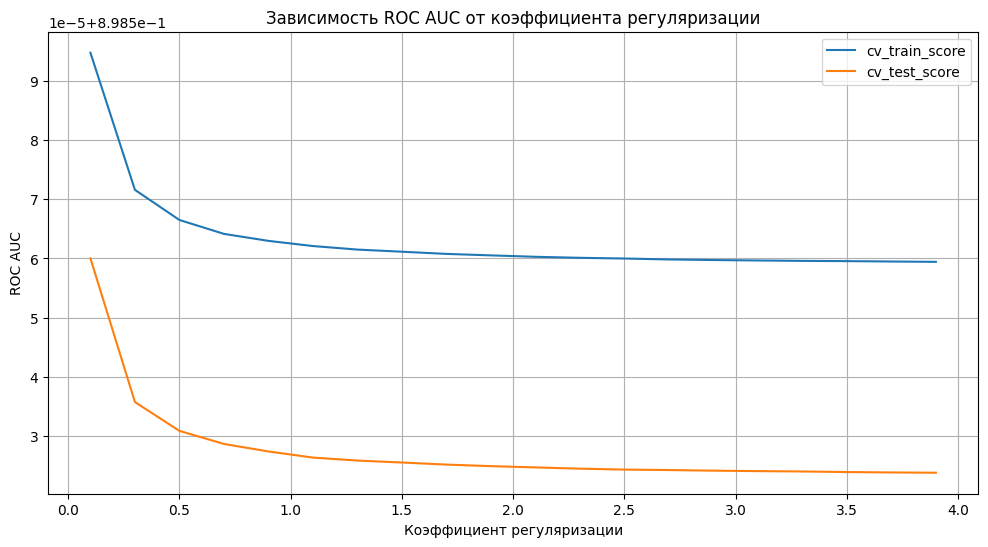

In [52]:
plt.plot(alphas, cv_scores_train, label = 'cv_train_score')
plt.plot(alphas, cv_scores_test, label = 'cv_test_score')
plt.gcf().set_size_inches((12,6))
plt.grid()
plt.legend()
plt.title('Зависимость ROC AUC от коэффициента регуляризации')
plt.xlabel('Коэффициент регуляризации')
plt.ylabel('ROC AUC')
plt.show()

In [53]:
c_L2 = alphas[np.argmax(cv_scores_test)]
print("Наилучший коэффициент L2 - регуляризации:", alphas[np.argmax(cv_scores_test)])

Наилучший коэффициент L2 - регуляризации: 0.1


In [54]:
# Фит итоговой модели
LogReg_final = LogisticRegression(random_state = RANDOM_STATE, penalty = 'l2', C = c_L2)
LogReg_final.fit(X_train_WOE_final, y_train_WOE)
y_pred = LogReg_final.predict_proba(X_test_WOE_final)[:,1]
y_pred_train = LogReg_final.predict_proba(X_train_WOE_final)[:,1]
print("ROC AUC val:", roc_auc_score(y_test_WOE, y_pred))
print("ROC AUC train:", roc_auc_score(y_train_WOE, y_pred_train))

ROC AUC val: 0.8955076544474803
ROC AUC train: 0.8985766989187235
